## Uploading our dataset

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

## Importing Important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from tensorflow.keras.utils import img_to_array,load_img
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
#EDA

len(os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_datagen = image.ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True, preprocessing_function=preprocess_input)
val_datagen = image.ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory= "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",target_size=(224, 224,),batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size=(224, 224,),batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label=train.next()

In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

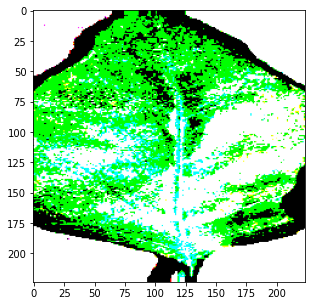

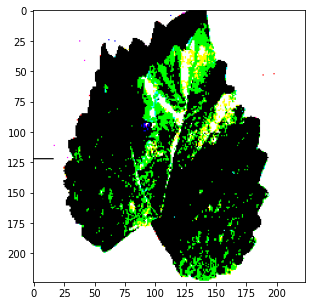

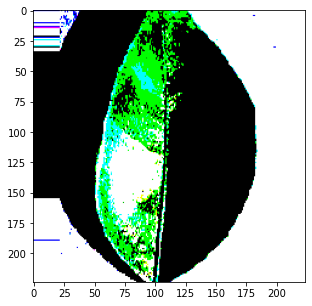

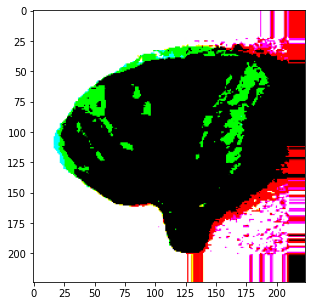

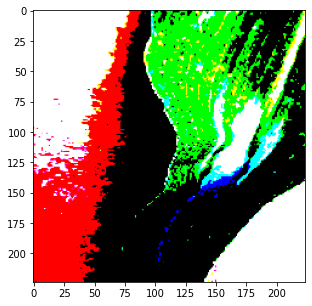

In [ ]:

plotImage(t_img[:5], label[:5])

### Building our Model

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(224,224,3), include_top= False)

In [ ]:
for layer in base_model.layers:
  layer.trainable= False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
x= Flatten()(base_model.output)
x= Dense(units=38,activation='softmax')(x)

#Creating our Model
model = Model(base_model.input,x)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics = ['accuracy'])

### Early Stopping and Model Check Point

In [ ]:
from keras.utils.version_utils import ModelVersionSelector
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience= 3,verbose=1)

#modle checkpoint
mc = ModelCheckpoint(filepath='best_model.h5',
                     monitor ='val_accuracy', min_delta=0.01,
                     patience= 3,verbose=1,save_best_only=True)
cb = [es,mc]



In [ ]:
from keras import callbacks
his = model.fit_generator(train, steps_per_epoch=16, epochs=20,verbose=1,
                          callbacks=cb, validation_data= val,
                          validation_steps=16)

<ipython-input-48-e43d9c183049>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train, steps_per_epoch=16, epochs=20,verbose=1,


Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 26.1338 - accuracy: 0.1562
Epoch 1: val_accuracy improved from -inf to 0.35742, saving model to best_model.h5
16/16 [==============================] - 11s 627ms/step - loss: 26.1338 - accuracy: 0.1562 - val_loss: 16.8230 - val_accuracy: 0.3574
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 13.4051 - accuracy: 0.4062
Epoch 2: val_accuracy improved from 0.35742 to 0.56445, saving model to best_model.h5
16/16 [==============================] - 13s 825ms/step - loss: 13.4051 - accuracy: 0.4062 - val_loss: 8.3400 - val_accuracy: 0.5645
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 11.0162 - accuracy: 0.4980
Epoch 3: val_accuracy improved from 0.56445 to 0.61914, saving model to best_model.h5
16/16 [==============================] - 11s 693ms/step - loss: 11.0162 - accuracy: 0.4980 - val_loss: 7.9958 - val_accuracy: 0.6191
Epoch 4/20
16/16 [==============================] - ETA: 0s 

In [ ]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

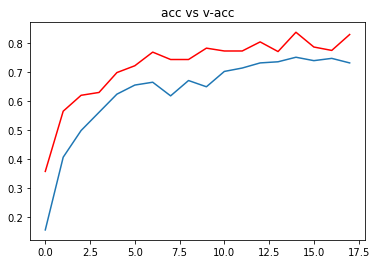

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v-acc')
plt.show()

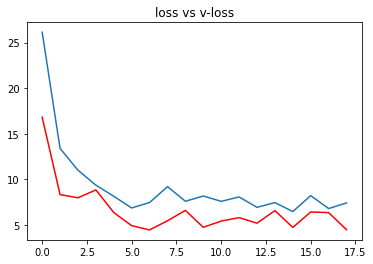

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# Load the best model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate(val)[1]
print(f"The accuracy of your model is ={acc*100}%")

550/550 [==============================] - 94s 169ms/step - loss: 5.2832 - accuracy: 0.7957
The accuracy of your model is =79.56976890563965%


In [ ]:
ref= dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img = load_img(path, target_size=(224,224))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax( model.predict(img))
  print(f"The image belongs to {ref[pred]}")

### Model Testing

In [ ]:
path = "/content/test/test/TomatoYellowCurlVirus3.JPG"
prediction(path)

1/1 [==============================] - 1s 957ms/step
The image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus
